In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [5]:
tc = tips.corr()
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


### i) heatmap()

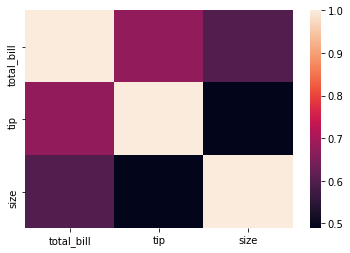

In [6]:
sns.heatmap(tips.corr())

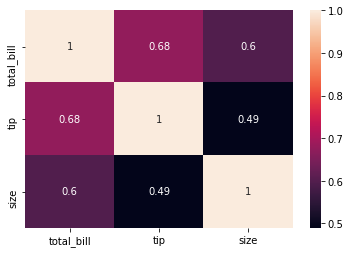

In [7]:
sns.heatmap(tc, annot = True)   # annot - annotates actual numeric value that belond to each cell

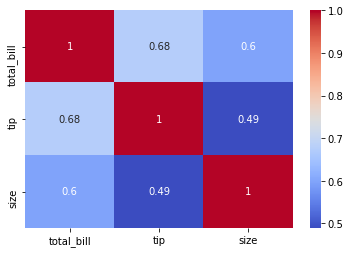

In [8]:
sns.heatmap(tc, annot = True, cmap = 'coolwarm') 

In [9]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [10]:
fp = flights.pivot_table(index = 'month', columns = 'year', values = 'passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


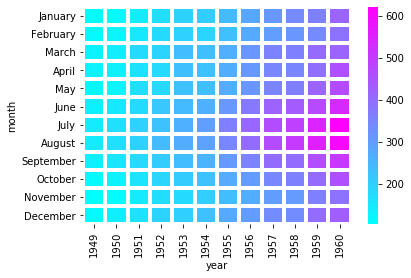

In [11]:
sns.heatmap(fp,cmap = 'cool',linecolor = 'white', linewidth = 3)

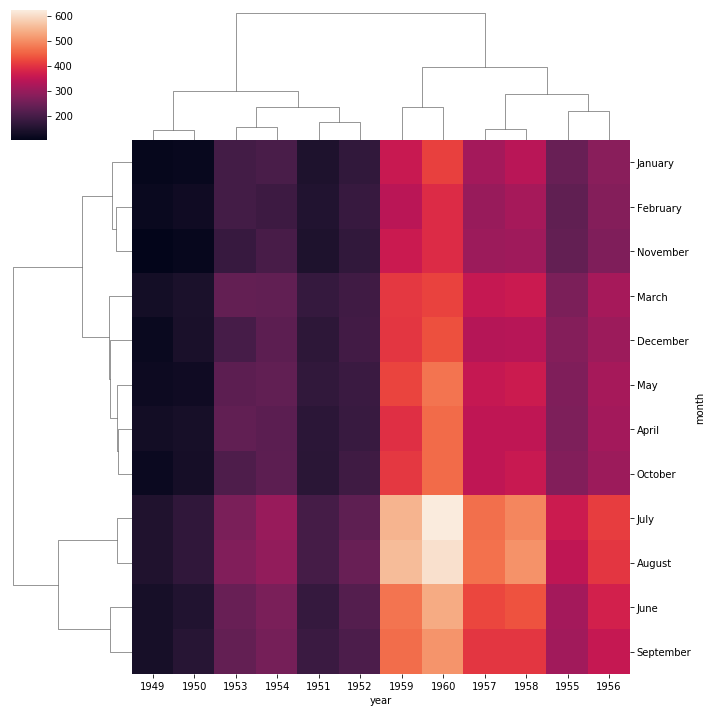

In [12]:
sns.clustermap(fp)   # clusters rows and cols together based on similarity

we can see the months are not in any specified order since most similar months are put together. Same with year.

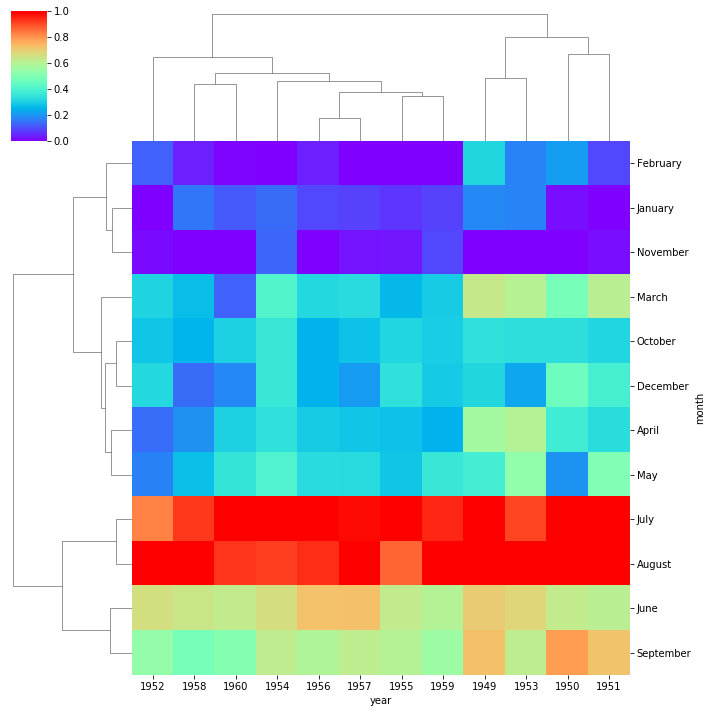

In [13]:
sns.clustermap(fp,cmap = 'rainbow', standard_scale = 1)

## Grid

In [14]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

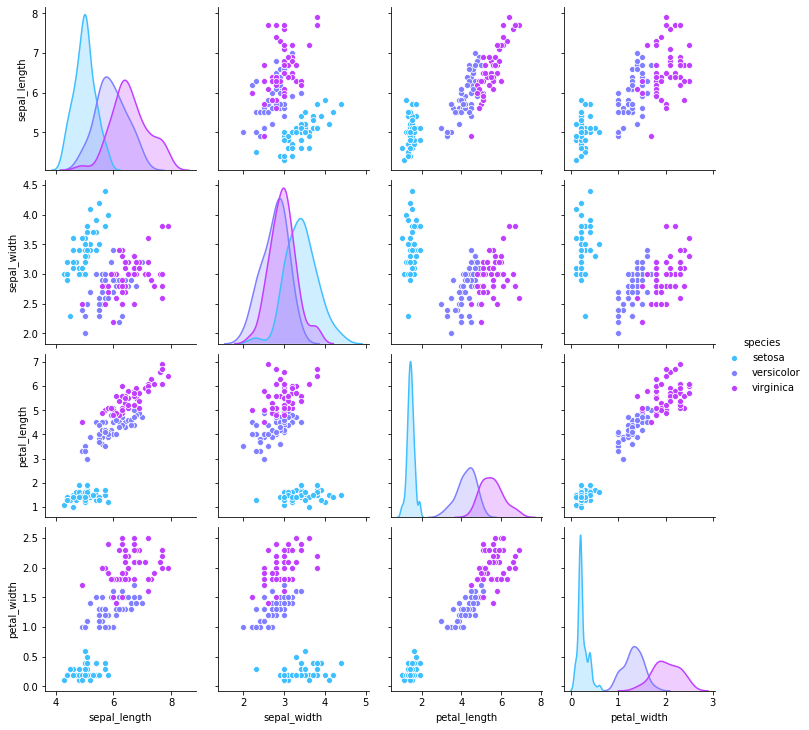

In [16]:
sns.pairplot(iris, hue = 'species', palette = 'cool')

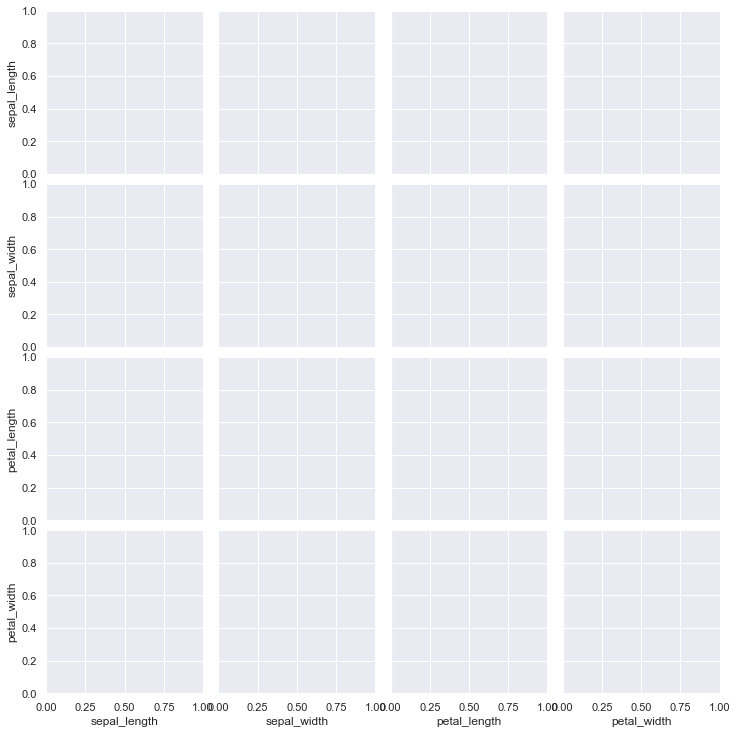

In [17]:
sns.set()                 # DONE SO THAT THE GRIDS ARE VISIBLE . WE CAN ALSO USE : sns.set_style("darkgrid") 
sns.PairGrid(iris)

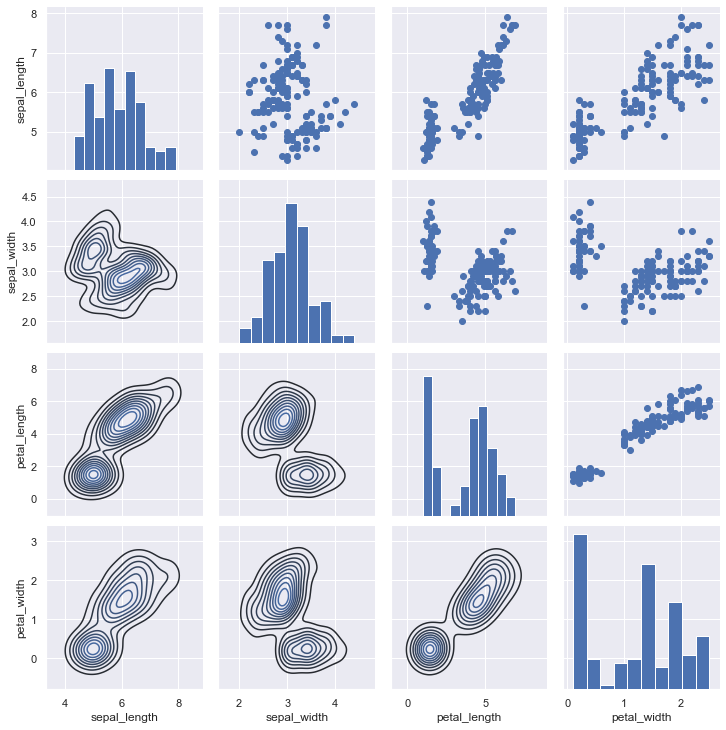

In [18]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)#(sns.scatterplot)
g.map_lower(sns.kdeplot)

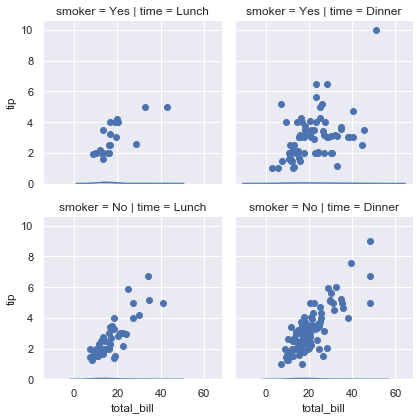

In [24]:
f = sns.FacetGrid(data = tips , col = 'time', row = 'smoker')
f.map(sns.distplot, 'total_bill')           # for one argument
f.map(plt.scatter, 'total_bill', 'tip')     # for 2 arguments

## Regression Plots

### lmplot()

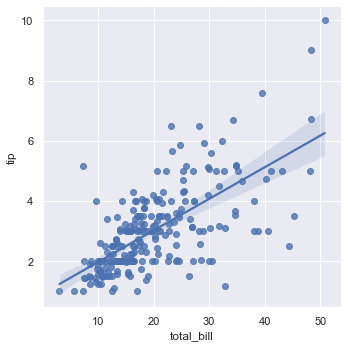

In [26]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips)

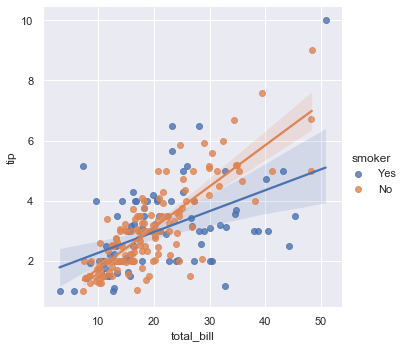

In [27]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker')

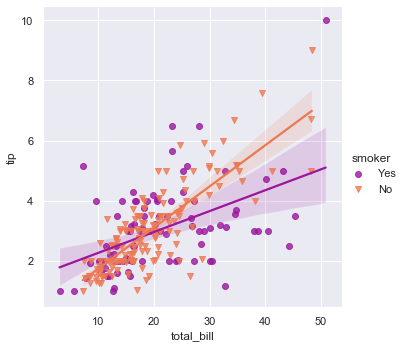

In [42]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', markers = ['o','v'], palette = 'plasma') # matplotlib markers are used

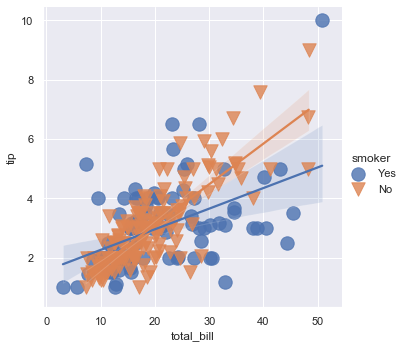

In [32]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', markers = ['o','v'], scatter_kws = {'s': 180}) 

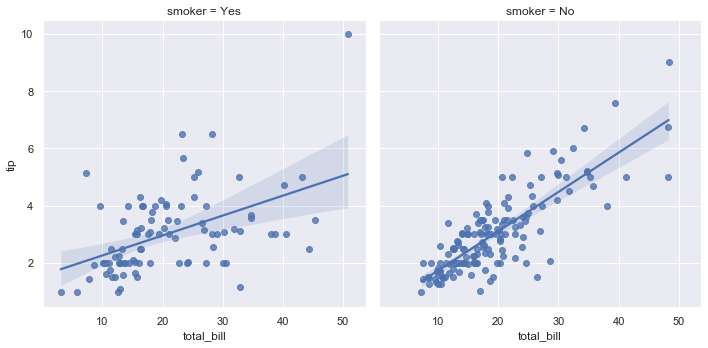

In [40]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'smoker')

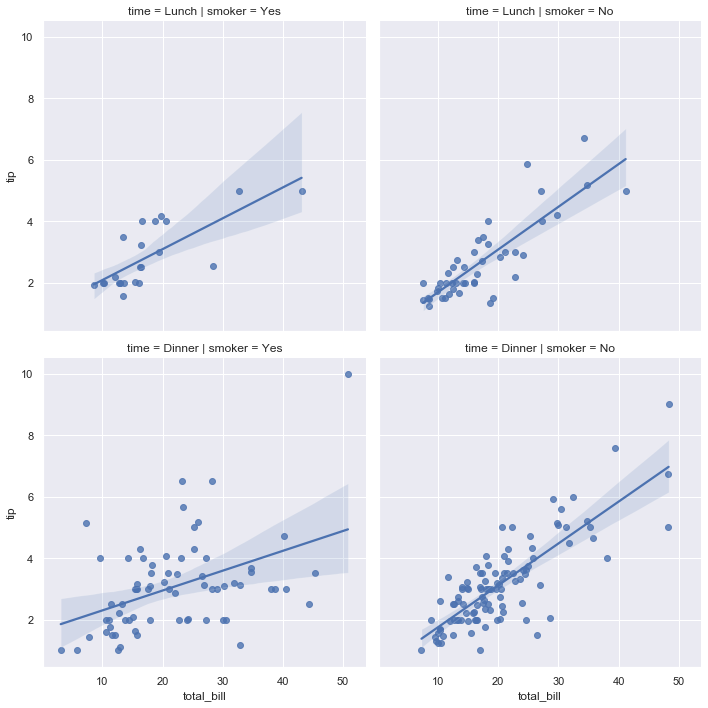

In [38]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'smoker', row = 'time')

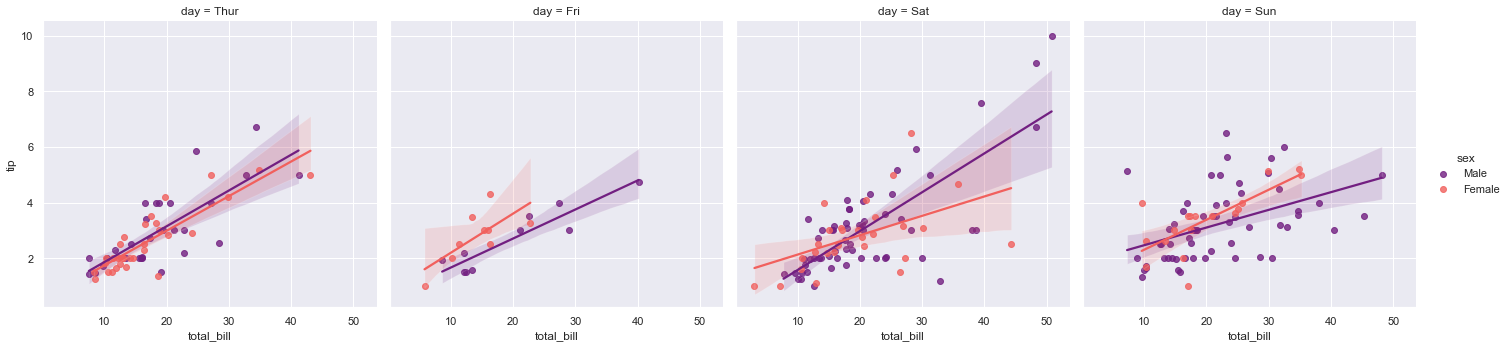

In [43]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day', hue = 'sex', palette = 'magma')

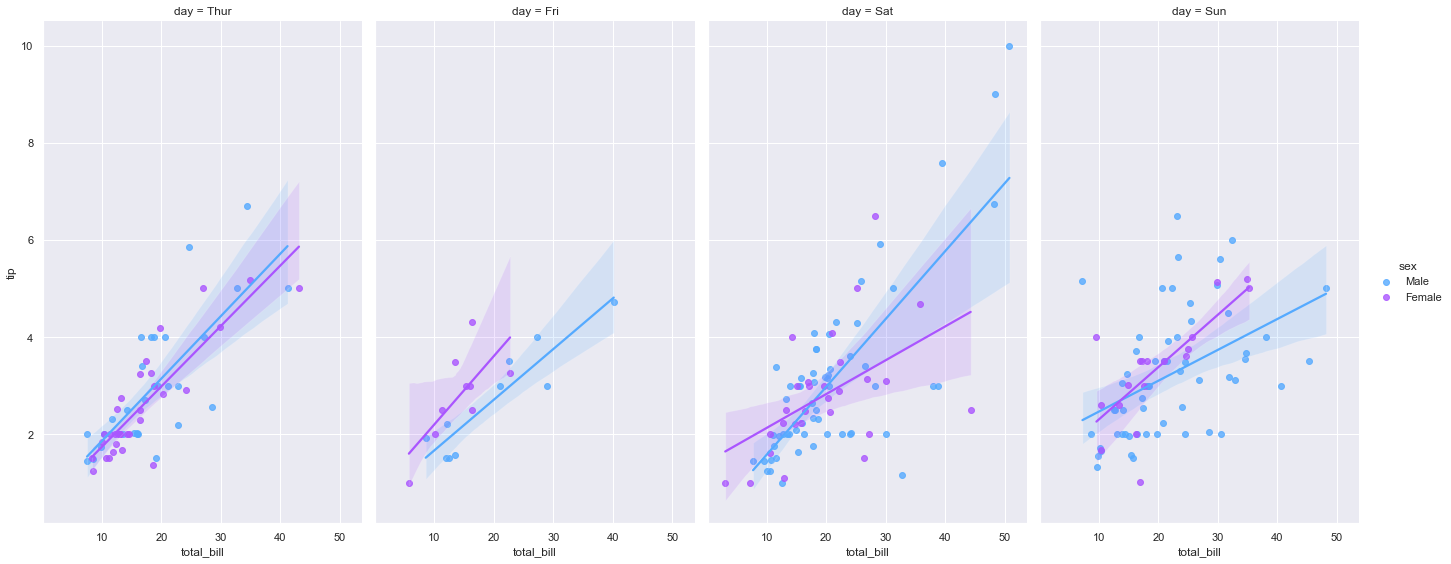

In [51]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day', hue = 'sex', palette = 'cool', aspect = 0.6 ,size = 8)
# avoid warning by using height in place of size

### style and color

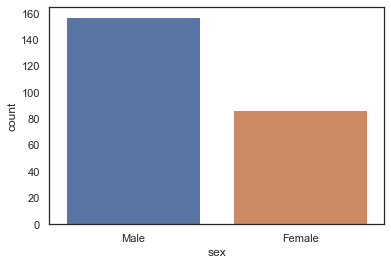

In [54]:
sns.set_style('white')
sns.countplot(x= 'sex', data = tips)

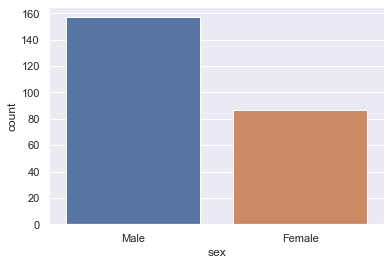

In [57]:
sns.set_style('darkgrid')
sns.countplot(x= 'sex', data = tips)

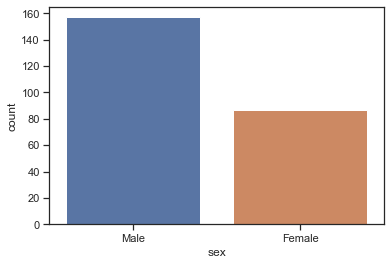

In [61]:
sns.set_style('ticks')
sns.countplot(x= 'sex', data = tips)

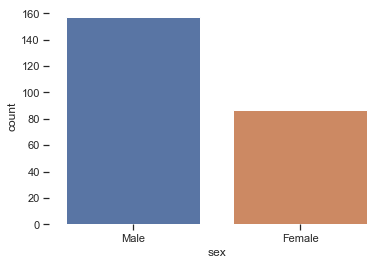

In [64]:
sns.set_style('ticks')
sns.countplot(x= 'sex', data = tips)
#sns.despine()    # removes top and right spines/ticks
sns.despine( left = True, bottom = True)


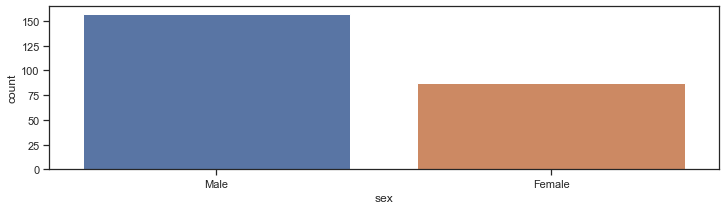

In [67]:
plt.figure(figsize = (12,3))               # we can use matplotlib to resize the plot
sns.countplot(x= 'sex', data = tips)

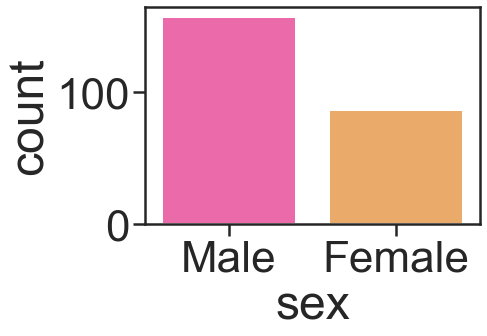

In [73]:
sns.set_context('poster', font_scale = 2)
sns.countplot(x= 'sex', data = tips, palette ='spring')

In [6]:
titanic = sns.load_dataset('titanic')

In [7]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
